# Housing Data Cleaning

In [337]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Housing Data

## "Bottom Tier" House Values

In [338]:
bottom_tier = pd.read_csv('bottom_tier.csv')
bottom_tier.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,120563.29,...,578509.76,580476.11,585072.89,592416.77,601279.46,610308.81,617991.47,624378.00,629015.16,629399.17
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,69971.82,...,163745.94,164734.17,165692.84,166831.15,168315.38,169777.48,170958.85,171669.84,172071.54,172165.87
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,61348.08,...,195101.24,195460.75,196103.37,196682.24,197248.66,197474.82,197599.06,197548.11,197625.16,198048.80
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,80020.54,...,333735.75,334227.85,335490.49,337442.84,339900.38,342191.33,344224.21,345825.79,346831.60,347325.69
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,127922.59,...,604123.73,609236.96,616191.04,624265.53,632797.69,640792.40,647475.63,652398.99,655404.29,657596.79


In [339]:
cols = bottom_tier.columns.to_list()
rest_of_cols = cols[9:]
bottom_tier_melted = pd.melt(bottom_tier, id_vars=cols[:9], 
                          var_name='Date', value_name='Average Home Value Estimate')
bottom_tier_melted.rename(columns={'Average Home Value Estimate': 'Bottom-Tier Average Home Value Estimate'}, inplace=True)
bottom_tier_melted['Date'] = pd.to_datetime(bottom_tier_melted['Date'], format='%Y-%m-%d')
bottom_tier_melted['Year'] = bottom_tier_melted['Date'].dt.year
bottom_tier_melted['Month'] = bottom_tier_melted['Date'].dt.month
bottom_tier_melted.sample(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,Date,Bottom-Tier Average Home Value Estimate,Year,Month
515716,89,1748,Lee County,county,VA,VA,NaN,51,105,2014-04-30,39141.91,2014,4
549015,2102,1991,Winston County,county,MS,MS,NaN,28,159,2015-03-31,NaN,2015,3
149673,1257,2471,Nemaha County,county,KS,KS,NaN,20,131,2004-02-29,NaN,2004,2
543177,2943,2174,Jeff Davis County,county,GA,GA,NaN,13,161,2015-01-31,28294.51,2015,1
341547,1484,1933,Waseca County,county,MN,MN,NaN,27,161,2009-06-30,NaN,2009,6


In [340]:
bottom_tier_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868734 entries, 0 to 868733
Data columns (total 13 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   RegionID                                 868734 non-null  int64         
 1   SizeRank                                 868734 non-null  int64         
 2   RegionName                               868734 non-null  object        
 3   RegionType                               868734 non-null  object        
 4   StateName                                868734 non-null  object        
 5   State                                    868734 non-null  object        
 6   Metro                                    525113 non-null  object        
 7   StateCodeFIPS                            868734 non-null  int64         
 8   MunicipalCodeFIPS                        868734 non-null  int64         
 9   Date                      

Since we already have RegionID, RegionName and the State, I don't think we need the "Metro" column anyway.
I'll drop that column and then explore the Average Home Value Estimates column.

In [341]:
bottom_tier_melted.drop(columns=['Metro'], inplace=True)

In [342]:
num_missing = bottom_tier_melted[bottom_tier_melted['Bottom-Tier Average Home Value Estimate'].isna()].shape[0]
print("# missing values: ", num_missing)
print("Out of: ", bottom_tier_melted.shape[0])
print("Percent missing: ", (num_missing/bottom_tier_melted.shape[0])*100)

# missing values:  271635
Out of:  868734
Percent missing:  31.267913998991638


Given that this is time series information, I think any form of filling in the missing values via imputation, exptrapolation or interpolation would threaten the validity of any ML model

<AxesSubplot: xlabel='Bottom-Tier Average Home Value Estimate', ylabel='Count'>

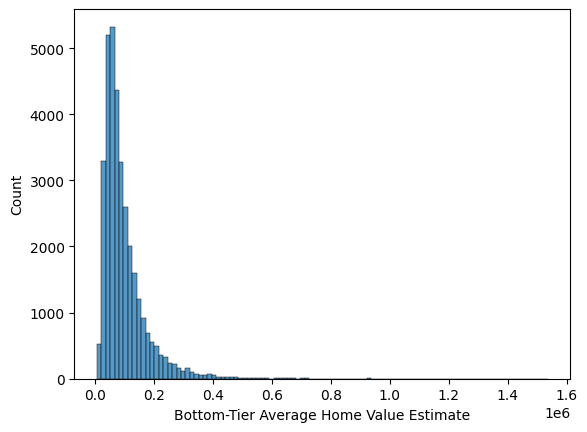

In [343]:
#sns.histplot(data=bottom_tier_melted, x='Average Home Value Estimate', binwidth=25000.00)
datasample = bottom_tier_melted.sample(50000)
#sns.scatterplot(data=datasample, x='Date', y='Average Home Value Estimate')
sns.histplot(data=datasample, x='Bottom-Tier Average Home Value Estimate', binwidth=15000.00)

<AxesSubplot: xlabel='Date', ylabel='Bottom-Tier Average Home Value Estimate'>

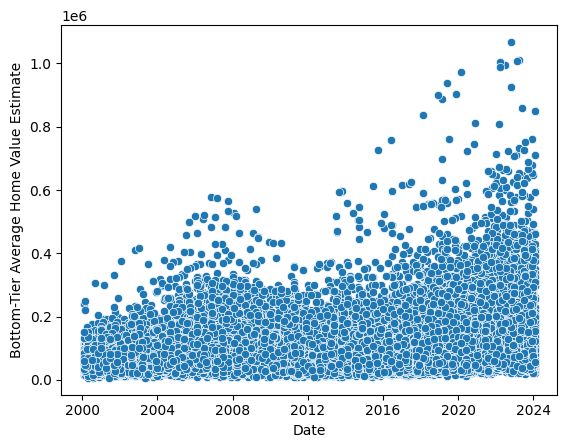

In [344]:
sns.scatterplot(data=bottom_tier_melted.sample(50000), x='Date', y='Bottom-Tier Average Home Value Estimate')

In [345]:
pd.options.display.float_format = '{:.2f}'.format
bottom_tier_melted.describe()

,RegionID,SizeRank,StateCodeFIPS,MunicipalCodeFIPS,Bottom-Tier Average Home Value Estimate,Year,Month
count,868734.00,868734.00,868734.00,868734.00,597099.00,868734.00,868734.00
mean,1904.44,1554.79,30.24,103.19,96888.43,2011.54,6.48
std,12745.44,912.88,15.06,107.46,76872.95,6.95,3.46
min,66.00,0.00,1.00,1.00,6028.60,2000.00,1.00
25%,870.00,760.00,18.00,35.00,49685.76,2006.00,3.00
50%,1667.50,1549.50,29.00,79.00,75169.08,2012.00,6.00
75%,2480.00,2337.00,45.00,133.00,118335.69,2018.00,9.00
max,698720.00,3212.00,56.00,840.00,1547936.51,2024.00,12.00


In [346]:
bottom_tier_melted.dropna(inplace=True)

## "Top Tier" House Values

In [347]:
top_tier = pd.read_csv('top_tier.csv')
top_tier.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,389752.01,...,1339166.69,1339864.26,1349494.08,1367128.36,1390244.67,1413416.01,1431880.01,1444286.53,1450876.82,1446084.76
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,299183.84,...,468886.52,470922.08,473506.96,476084.61,478598.89,480078.12,480988.12,481244.92,481103.64,480970.13
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,215869.03,...,444863.58,445672.18,447263.94,448715.79,450170.08,451024.43,451333.98,450998.09,450657.28,451043.82
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,248448.88,...,686011.88,688457.21,692428.50,697234.55,701981.10,706180.69,710209.50,713575.03,715361.02,715544.90
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,380822.96,...,1360175.96,1369771.32,1384815.02,1402608.79,1421437.41,1439901.35,1455305.47,1465239.47,1468839.58,1470213.08


In [348]:
cols = top_tier.columns.to_list()
rest_of_cols = cols[9:]
top_tier_melted = pd.melt(top_tier, id_vars=cols[:9], 
                          var_name='Date', value_name='Average Home Value Estimate')
top_tier_melted.rename(columns={'Average Home Value Estimate': 'Top-Tier Average Home Value Estimate'}, inplace=True)
top_tier_melted['Date'] = pd.to_datetime(top_tier_melted['Date'], format='%Y-%m-%d')
top_tier_melted['Year'] = top_tier_melted['Date'].dt.year
top_tier_melted['Month'] = top_tier_melted['Date'].dt.month
top_tier_melted.sample(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,Date,Top-Tier Average Home Value Estimate,Year,Month
487739,1459,1455,Vernon County,county,WI,WI,NaN,55,123,2013-03-31,203189.90,2013,3
779627,1524,904,Autauga County,county,AL,AL,"Montgomery, AL",1,1,2021-02-28,294796.04,2021,2
199827,1878,2925,Lincoln County,county,NV,NV,NaN,32,17,2005-05-31,NaN,2005,5
482751,1420,2665,Taylor County,county,GA,GA,NaN,13,269,2013-01-31,159227.77,2013,1
536970,1462,1438,Wabash County,county,IN,IN,"Wabash, IN",18,169,2014-07-31,166340.10,2014,7


In [349]:
top_tier_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889542 entries, 0 to 889541
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   RegionID                              889542 non-null  int64         
 1   SizeRank                              889542 non-null  int64         
 2   RegionName                            889542 non-null  object        
 3   RegionType                            889542 non-null  object        
 4   StateName                             889542 non-null  object        
 5   State                                 889542 non-null  object        
 6   Metro                                 528870 non-null  object        
 7   StateCodeFIPS                         889542 non-null  int64         
 8   MunicipalCodeFIPS                     889542 non-null  int64         
 9   Date                                  889542 non-null  date

In [350]:
num_missing = top_tier_melted[top_tier_melted['Top-Tier Average Home Value Estimate'].isna()].shape[0]
print("# missing values: ", num_missing)
print("Out of: ", top_tier_melted.shape[0])
print("Percent missing: ", (num_missing/top_tier_melted.shape[0])*100)

# missing values:  271387
Out of:  889542
Percent missing:  30.5086212905068


<AxesSubplot: xlabel='Top-Tier Average Home Value Estimate', ylabel='Count'>

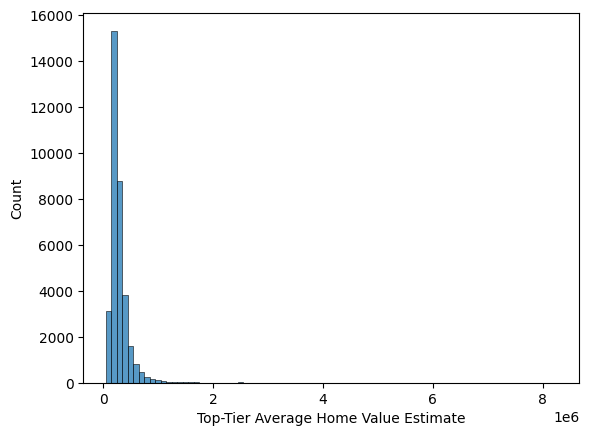

In [351]:
datasample = top_tier_melted.sample(50000)
sns.histplot(data=datasample, x='Top-Tier Average Home Value Estimate', binwidth=100000.00)

<AxesSubplot: xlabel='Date', ylabel='Top-Tier Average Home Value Estimate'>

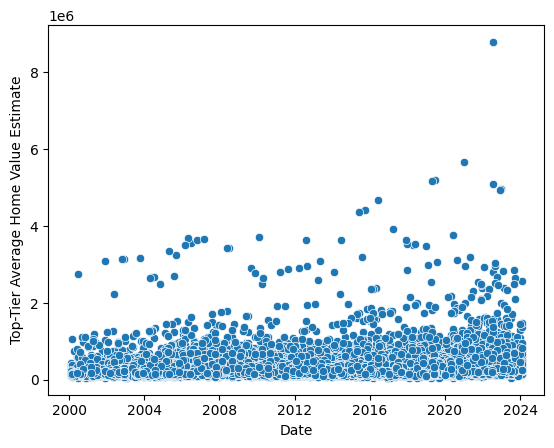

In [352]:
sns.scatterplot(data=top_tier_melted.sample(50000), x='Date', y='Top-Tier Average Home Value Estimate')

In [353]:
top_tier_melted.describe()

,RegionID,SizeRank,StateCodeFIPS,MunicipalCodeFIPS,Top-Tier Average Home Value Estimate,Year,Month
count,889542.00,889542.00,889542.00,889542.00,618155.00,889542.00,889542.00
mean,1898.99,1583.16,30.26,103.67,290844.20,2011.54,6.48
std,12596.21,922.74,15.08,108.00,225360.95,6.95,3.46
min,66.00,0.00,1.00,1.00,47193.77,2000.00,1.00
25%,872.00,778.00,18.00,35.00,184531.67,2006.00,3.00
50%,1669.50,1583.50,29.00,79.00,238729.58,2012.00,6.00
75%,2477.00,2383.00,45.00,133.00,328149.63,2018.00,9.00
max,698720.00,3214.00,56.00,840.00,8784955.24,2024.00,12.00


In [354]:
top_tier_melted.dropna(inplace=True)

## Rent Price Estimates

In [355]:
rent = pd.read_csv('allhomes_rent.csv')
rent.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31
0,102001,0,United States,country,NaN,1226.80,1233.43,1242.34,1252.11,1261.79,...,1922.82,1936.20,1946.82,1956.81,1962.95,1965.62,1963.38,1958.46,1954.94,1957.59
1,394913,1,"New York, NY",msa,NY,2270.42,2285.73,2302.83,2324.40,2339.85,...,3063.26,3102.15,3137.46,3161.02,3169.60,3168.28,3152.14,3129.82,3111.53,3115.27
2,753899,2,"Los Angeles, CA",msa,CA,1829.23,1841.43,1856.54,1870.31,1884.66,...,2848.45,2857.42,2868.02,2881.27,2893.29,2897.35,2893.95,2880.86,2871.10,2874.94
3,394463,3,"Chicago, IL",msa,IL,1394.08,1401.46,1411.96,1421.44,1432.47,...,1882.49,1905.28,1924.64,1937.18,1944.32,1942.06,1934.87,1927.16,1929.97,1940.72
4,394514,4,"Dallas, TX",msa,TX,1114.51,1119.85,1127.78,1138.71,1148.86,...,1769.22,1777.68,1785.54,1794.21,1795.81,1792.19,1784.85,1778.53,1769.55,1764.81
5,394692,5,"Houston, TX",msa,TX,1226.35,1230.66,1237.41,1249.37,1259.15,...,1627.74,1637.75,1647.02,1654.56,1655.95,1653.74,1648.40,1642.98,1641.34,1643.65
6,395209,6,"Washington, DC",msa,VA,1711.96,1718.52,1730.20,1738.15,1747.96,...,2207.29,2227.24,2246.16,2262.29,2273.23,2278.11,2276.75,2271.76,2265.02,2268.55
7,394974,7,"Philadelphia, PA",msa,PA,1246.68,1253.12,1265.44,1272.69,1279.37,...,1751.59,1762.52,1768.23,1776.67,1785.26,1797.74,1804.62,1805.88,1800.96,1801.13
8,394856,8,"Miami, FL",msa,FL,1501.54,1508.43,1514.02,1520.73,1530.33,...,2670.82,2681.23,2690.81,2697.59,2702.68,2706.84,2717.06,2722.08,2717.72,2715.19
9,394347,9,"Atlanta, GA",msa,GA,1057.01,1062.78,1066.37,1077.28,1085.05,...,1920.50,1927.08,1928.36,1929.68,1930.37,1930.84,1921.84,1908.73,1897.78,1899.66


In [356]:
# Drop first row which refers to entire USA
rent.drop(index=0, inplace=True)
cols = rent.columns.to_list()
rest_of_cols = cols[5:]
rent_melted = pd.melt(rent, id_vars=cols[:5], 
                          var_name='Date', value_name='Average Rent')
rent_melted['Date'] = pd.to_datetime(rent_melted['Date'], format='%Y-%m-%d')
rent_melted['Year'] = rent_melted['Date'].dt.year
rent_melted['Month'] = rent_melted['Date'].dt.month
rent_melted.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Rent,Year,Month
0,394913,1,"New York, NY",msa,NY,2015-01-31,2270.42,2015,1
1,753899,2,"Los Angeles, CA",msa,CA,2015-01-31,1829.23,2015,1
2,394463,3,"Chicago, IL",msa,IL,2015-01-31,1394.08,2015,1
3,394514,4,"Dallas, TX",msa,TX,2015-01-31,1114.51,2015,1
4,394692,5,"Houston, TX",msa,TX,2015-01-31,1226.35,2015,1


In [357]:
rent_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63002 entries, 0 to 63001
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RegionID      63002 non-null  int64         
 1   SizeRank      63002 non-null  int64         
 2   RegionName    63002 non-null  object        
 3   RegionType    63002 non-null  object        
 4   StateName     63002 non-null  object        
 5   Date          63002 non-null  datetime64[ns]
 6   Average Rent  34752 non-null  float64       
 7   Year          63002 non-null  int64         
 8   Month         63002 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 4.3+ MB


In [358]:
num_missing = rent_melted[rent_melted['Average Rent'].isna() == True].shape[0]
print("# missing values: ", num_missing)
print("Out of: ", rent_melted.shape[0])
print("Percent missing: ", (num_missing/rent_melted.shape[0])*100)

# missing values:  28250
Out of:  63002
Percent missing:  44.839846354083996


<AxesSubplot: xlabel='Average Rent', ylabel='Count'>

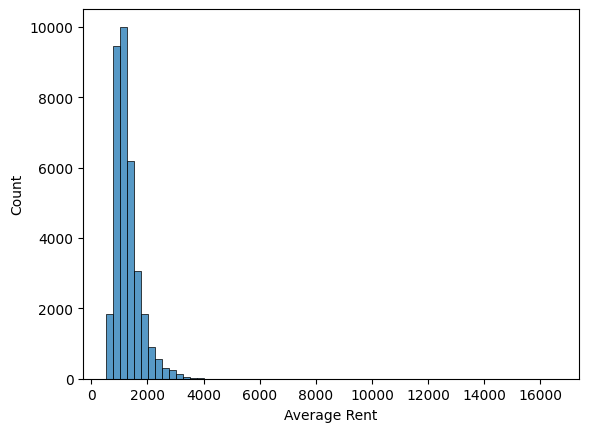

In [359]:
sns.histplot(data=rent_melted, x='Average Rent', binwidth=250.00)

<AxesSubplot: xlabel='Date', ylabel='Average Rent'>

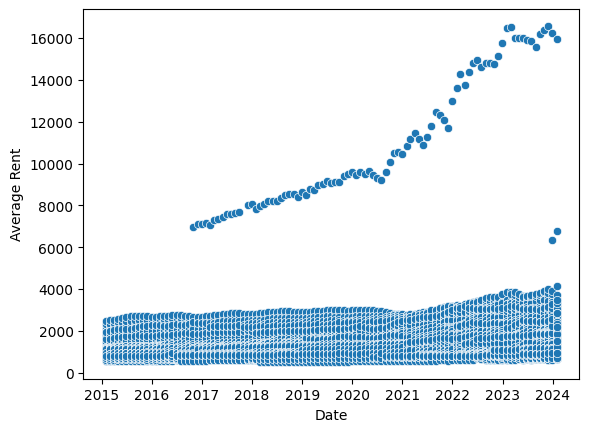

In [360]:
sns.scatterplot(data=rent_melted, x='Date', y='Average Rent')

In [361]:
rent_melted.describe()

,RegionID,SizeRank,Average Rent,Year,Month
count,63002.00,63002.00,34752.00,63002.00,63002.00
mean,414107.96,320.26,1288.38,2019.05,6.45
std,84627.66,210.91,680.18,2.61,3.48
min,394298.00,1.00,513.75,2015.00,1.00
25%,394543.00,146.00,957.34,2017.00,3.00
50%,394782.00,293.50,1161.91,2019.00,6.00
75%,395051.00,471.00,1438.84,2021.00,9.00
max,845169.00,916.00,16582.72,2024.00,12.00


In [362]:
rent_melted.dropna(inplace=True)

## Days to Close

In [363]:
days_to_close = pd.read_csv('meandaystoclose.csv')
days_to_close.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,102001,0,United States,country,NaN,38.00,34.00,33.00,34.00,35.00,...,33.00,33.00,34.00,35.00,35.00,34.00,34.00,34.00,33.00,33.00
1,394913,1,"New York, NY",msa,NY,62.00,58.00,53.00,49.00,51.00,...,52.00,53.00,54.00,56.00,56.00,56.00,55.00,55.00,53.00,53.00
2,753899,2,"Los Angeles, CA",msa,CA,38.00,33.00,32.00,32.00,33.00,...,29.00,29.00,30.00,30.00,30.00,29.00,29.00,29.00,29.00,30.00
3,394463,3,"Chicago, IL",msa,IL,46.00,42.00,39.00,41.00,44.00,...,36.00,38.00,38.00,40.00,39.00,37.00,37.00,37.00,37.00,36.00
4,394514,4,"Dallas, TX",msa,TX,22.00,21.00,20.00,21.00,22.00,...,28.00,29.00,29.00,29.00,29.00,28.00,28.00,28.00,28.00,28.00
5,394692,5,"Houston, TX",msa,TX,33.00,30.00,31.00,32.00,33.00,...,29.00,30.00,30.00,30.00,NaN,NaN,29.00,29.00,29.00,29.00
6,395209,6,"Washington, DC",msa,VA,38.00,27.00,22.00,24.00,25.00,...,29.00,30.00,30.00,31.00,30.00,29.00,29.00,29.00,30.00,29.00
7,394974,7,"Philadelphia, PA",msa,PA,41.00,36.00,33.00,38.00,38.00,...,37.00,38.00,39.00,41.00,40.00,39.00,38.00,37.00,37.00,37.00
8,394856,8,"Miami, FL",msa,FL,40.00,36.00,36.00,37.00,38.00,...,35.00,36.00,37.00,38.00,38.00,36.00,37.00,36.00,36.00,35.00
9,394347,9,"Atlanta, GA",msa,GA,35.00,31.00,32.00,32.00,33.00,...,27.00,28.00,27.00,27.00,26.00,24.00,26.00,25.00,25.00,25.00


In [364]:
# Drop first row which refers to entire USA
days_to_close.drop(index=0, inplace=True)
cols = days_to_close.columns.to_list()
rest_of_cols = cols[5:]
days_to_close_melted = pd.melt(days_to_close, id_vars=cols[:5], 
                          var_name='Date', value_name='Average Days to Close')
days_to_close_melted['Date'] = pd.to_datetime(days_to_close_melted['Date'], format='%Y-%m-%d')
days_to_close_melted['Year'] = days_to_close_melted['Date'].dt.year
days_to_close_melted['Month'] = days_to_close_melted['Date'].dt.month
days_to_close_melted.sample(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Days to Close,Year,Month
31656,394587,495,"Farmington, MO",msa,MO,2023-03-31,33.00,2023,3
23747,394653,61,"Greenville, SC",msa,SC,2021-12-31,38.00,2021,12
4696,394747,167,"Kingsport, TN",msa,TN,2018-10-31,38.00,2018,10
5769,394729,243,"Joplin, MO",msa,MO,2018-12-31,36.00,2018,12
34200,394456,549,"Charleston, IL",msa,IL,2023-08-31,40.00,2023,8


In [365]:
days_to_close_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36288 entries, 0 to 36287
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RegionID               36288 non-null  int64         
 1   SizeRank               36288 non-null  int64         
 2   RegionName             36288 non-null  object        
 3   RegionType             36288 non-null  object        
 4   StateName              36288 non-null  object        
 5   Date                   36288 non-null  datetime64[ns]
 6   Average Days to Close  29645 non-null  float64       
 7   Year                   36288 non-null  int64         
 8   Month                  36288 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 2.5+ MB


In [366]:
num_missing = days_to_close_melted[days_to_close_melted['Average Days to Close'].isna() == True].shape[0]
print("# missing values: ", num_missing)
print("Out of: ", days_to_close_melted.shape[0])
print("Percent missing: ", (num_missing/days_to_close_melted.shape[0])*100)

# missing values:  6643
Out of:  36288
Percent missing:  18.306327160493826


<AxesSubplot: xlabel='Average Days to Close', ylabel='Count'>

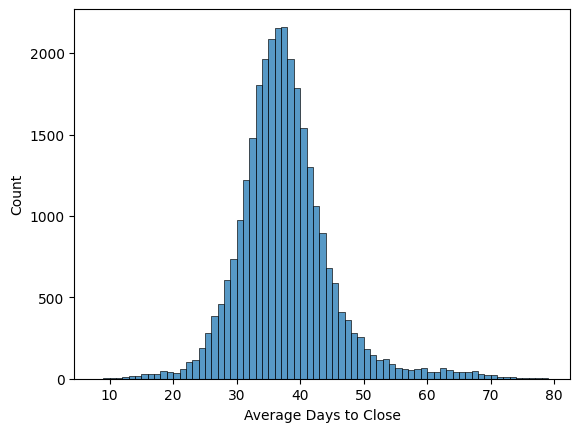

In [367]:
sns.histplot(data=days_to_close_melted, x='Average Days to Close', binwidth=1)

In [368]:
days_to_close_melted.dropna(inplace=True)

<AxesSubplot: xlabel='Date', ylabel='Average Days to Close'>

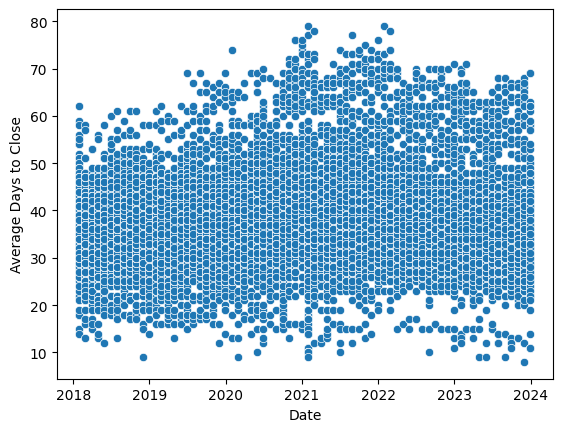

In [369]:
sns.scatterplot(data=days_to_close_melted, x='Date', y='Average Days to Close')

## New Construction Sales

In [370]:
new_construction_sales = pd.read_csv('newconstructionsales.csv')
new_construction_sales.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,102001,0,United States,country,NaN,37120.00,36515.00,46901.00,41666.00,44536.00,...,43248.00,38063.00,43242.00,42658.00,34310.00,37487.00,34248.00,32203.00,31260.00,32911.00
1,394913,1,"New York, NY",msa,NY,520.00,436.00,533.00,503.00,575.00,...,427.00,318.00,432.00,466.00,339.00,436.00,375.00,364.00,339.00,288.00
2,753899,2,"Los Angeles, CA",msa,CA,418.00,430.00,668.00,499.00,520.00,...,230.00,162.00,201.00,218.00,160.00,159.00,177.00,169.00,219.00,193.00
3,394463,3,"Chicago, IL",msa,IL,344.00,345.00,435.00,479.00,560.00,...,492.00,466.00,459.00,501.00,402.00,515.00,432.00,395.00,507.00,362.00
4,394514,4,"Dallas, TX",msa,TX,1502.00,1630.00,2183.00,1920.00,1758.00,...,2222.00,1933.00,2058.00,1974.00,1569.00,1726.00,1511.00,1409.00,1363.00,1619.00
5,394692,5,"Houston, TX",msa,TX,1365.00,1679.00,1876.00,1850.00,1797.00,...,2332.00,1989.00,2207.00,2145.00,1706.00,1723.00,1721.00,1579.00,1848.00,1760.00
6,395209,6,"Washington, DC",msa,VA,1205.00,1006.00,1334.00,968.00,1078.00,...,635.00,589.00,632.00,594.00,561.00,568.00,524.00,507.00,492.00,490.00
7,394974,7,"Philadelphia, PA",msa,PA,340.00,259.00,290.00,307.00,365.00,...,245.00,267.00,274.00,317.00,267.00,248.00,206.00,237.00,225.00,192.00
8,394856,8,"Miami, FL",msa,FL,550.00,514.00,855.00,752.00,794.00,...,272.00,244.00,244.00,273.00,241.00,241.00,245.00,239.00,251.00,245.00
9,394347,9,"Atlanta, GA",msa,GA,1711.00,2028.00,2469.00,2088.00,2029.00,...,1438.00,1189.00,1380.00,1283.00,1036.00,1078.00,1044.00,997.00,961.00,1054.00


In [371]:
# Drop first row which refers to entire USA
new_construction_sales.drop(index=0, inplace=True)
cols = new_construction_sales.columns.to_list()
rest_of_cols = cols[5:]
new_construction_sales_melted = pd.melt(new_construction_sales, id_vars=cols[:5], 
                          var_name='Date', value_name='New Construction Sales')
new_construction_sales_melted['Date'] = pd.to_datetime(new_construction_sales_melted['Date'], format='%Y-%m-%d')
new_construction_sales_melted['Year'] = new_construction_sales_melted['Date'].dt.year
new_construction_sales_melted['Month'] = new_construction_sales_melted['Date'].dt.month
new_construction_sales_melted.sample(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,New Construction Sales,Year,Month
987,395169,56,"Tulsa, OK",msa,OK,2018-04-30,174.00,2018,4
6980,394622,155,"Gainesville, FL",msa,FL,2019-11-30,36.00,2019,11
15817,394744,442,"Key West, FL",msa,FL,2022-03-31,NaN,2022,3
10884,394385,770,"Big Spring, TX",msa,TX,2020-11-30,NaN,2020,11
4528,394848,210,"Medford, OR",msa,OR,2019-03-31,26.00,2019,3


In [372]:
new_construction_sales_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   RegionID                22392 non-null  int64         
 1   SizeRank                22392 non-null  int64         
 2   RegionName              22392 non-null  object        
 3   RegionType              22392 non-null  object        
 4   StateName               22392 non-null  object        
 5   Date                    22392 non-null  datetime64[ns]
 6   New Construction Sales  17152 non-null  float64       
 7   Year                    22392 non-null  int64         
 8   Month                   22392 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.5+ MB


In [373]:
num_missing = new_construction_sales_melted[new_construction_sales_melted['New Construction Sales'].isna() == True].shape[0]
print("# missing values: ", num_missing)
print("Out of: ", new_construction_sales_melted.shape[0])
print("Percent missing: ", (num_missing/new_construction_sales_melted.shape[0])*100)

# missing values:  5240
Out of:  22392
Percent missing:  23.401214719542693


<AxesSubplot: xlabel='New Construction Sales', ylabel='Count'>

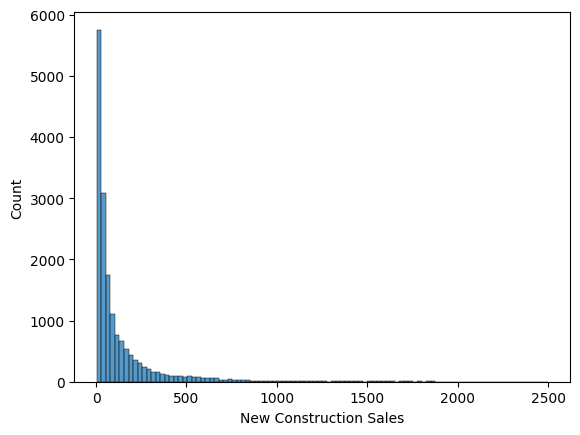

In [374]:
sns.histplot(data=new_construction_sales_melted, x='New Construction Sales', binwidth=25)

<AxesSubplot: xlabel='Date', ylabel='New Construction Sales'>

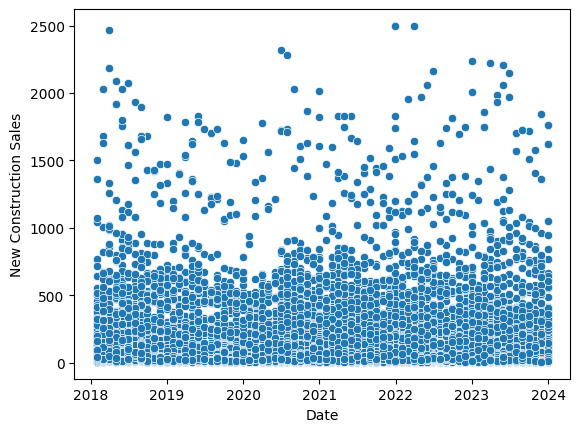

In [375]:
sns.scatterplot(data=new_construction_sales_melted.sample(20000), x='Date', y='New Construction Sales')

In [376]:
new_construction_sales_melted.dropna(inplace=True)

# For Sale Inventory

In [377]:
forsale = pd.read_csv("forsale_inventory.csv")
forsale.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31
0,102001,0,United States,country,NaN,1360756.00,1388126.00,1515705.00,1596752.00,1664789.00,...,872580.00,907928.00,941176.00,943629.00,966128.00,969449.00,996145.00,945121.00,855445.00,868203.00
1,394913,1,"New York, NY",msa,NY,66530.00,74575.00,80016.00,86445.00,91131.00,...,45463.00,46808.00,46323.00,43388.00,42156.00,42000.00,43603.00,40601.00,34417.00,34279.00
2,753899,2,"Los Angeles, CA",msa,CA,19893.00,21994.00,24106.00,25253.00,27455.00,...,15043.00,15399.00,15691.00,15978.00,16237.00,15880.00,16383.00,15367.00,12940.00,13810.00
3,394463,3,"Chicago, IL",msa,IL,34633.00,37046.00,44063.00,45649.00,47560.00,...,21766.00,22727.00,23626.00,23330.00,23749.00,23628.00,23743.00,21499.00,18163.00,17563.00
4,394514,4,"Dallas, TX",msa,TX,23048.00,23331.00,25749.00,28549.00,30376.00,...,20300.00,21925.00,23008.00,23312.00,23433.00,23281.00,23754.00,22881.00,21096.00,20897.00


In [378]:
# Drop first row which refers to entire USA
forsale.drop(index=0, inplace=True)
cols = forsale.columns.to_list()
rest_of_cols = cols[5:]
forsale_melted = pd.melt(forsale, id_vars=cols[:5], 
                          var_name='Date', value_name='Inventory')
forsale_melted['Date'] = pd.to_datetime(forsale_melted['Date'], format='%Y-%m-%d')
forsale_melted['Year'] = forsale_melted['Date'].dt.year
forsale_melted['Month'] = forsale_melted['Date'].dt.month
forsale_melted.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Inventory,Year,Month
0,394913,1,"New York, NY",msa,NY,2018-01-31,66530.00,2018,1
1,753899,2,"Los Angeles, CA",msa,CA,2018-01-31,19893.00,2018,1
2,394463,3,"Chicago, IL",msa,IL,2018-01-31,34633.00,2018,1
3,394514,4,"Dallas, TX",msa,TX,2018-01-31,23048.00,2018,1
4,394692,5,"Houston, TX",msa,TX,2018-01-31,24367.00,2018,1


In [379]:
forsale_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67671 entries, 0 to 67670
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    67671 non-null  int64         
 1   SizeRank    67671 non-null  int64         
 2   RegionName  67671 non-null  object        
 3   RegionType  67671 non-null  object        
 4   StateName   67671 non-null  object        
 5   Date        67671 non-null  datetime64[ns]
 6   Inventory   66413 non-null  float64       
 7   Year        67671 non-null  int64         
 8   Month       67671 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 4.6+ MB


In [380]:
num_missing = forsale_melted[forsale_melted['Inventory'].isna() == True].shape[0]
print("# missing values: ", num_missing)
print("Out of: ", forsale_melted.shape[0])
print("Percent missing: ", (num_missing/forsale_melted.shape[0])*100)

# missing values:  1258
Out of:  67671
Percent missing:  1.8589942515996511


<AxesSubplot: xlabel='Date', ylabel='Inventory'>

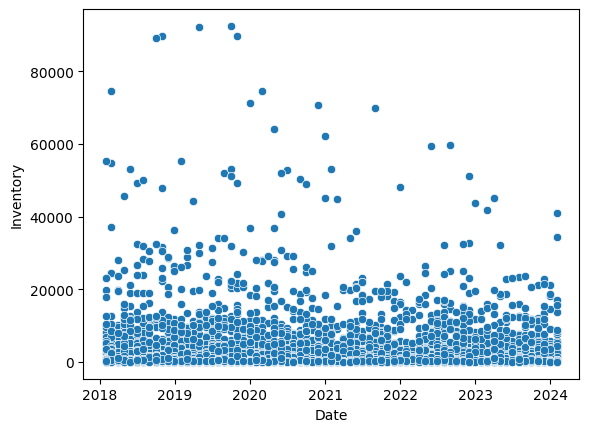

In [381]:
sns.scatterplot(data=forsale_melted.sample(20000), x='Date', y='Inventory')

In [382]:
forsale_melted.describe()

,RegionID,SizeRank,Inventory,Year,Month
count,67671.00,67671.00,66413.00,67671.00,67671.00
mean,425862.61,469.90,1217.33,2020.55,6.42
std,105275.77,270.70,3939.27,1.74,3.49
min,394297.00,1.00,5.00,2018.00,1.00
25%,394556.00,235.00,153.00,2019.00,3.00
50%,394813.00,471.00,319.00,2021.00,6.00
75%,395075.00,704.00,783.00,2022.00,9.00
max,845172.00,939.00,98511.00,2024.00,12.00


In [383]:
forsale_melted.dropna(inplace=True)

# For Sale Inventory

In [384]:
forsale_price = pd.read_csv("forsale_median_price.csv")
forsale_price.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31
0,102001,0,United States,country,NaN,255000.00,264900.00,269900.00,279000.00,281000.00,...,394322.00,399000.00,399500.00,399000.00,395000.00,395000.00,389900.00,385000.00,379000.00,379000.00
1,394913,1,"New York, NY",msa,NY,489000.00,505000.00,515000.00,519000.00,529900.00,...,659000.00,679000.00,679000.00,679000.00,670000.00,689000.00,695000.00,695000.00,689900.00,685000.00
2,753899,2,"Los Angeles, CA",msa,CA,709000.00,725000.00,730000.00,750000.00,750000.00,...,949000.00,979000.00,998000.00,999900.00,999000.00,1000000.00,999700.00,998000.00,989000.00,988000.00
3,394463,3,"Chicago, IL",msa,IL,269900.00,289000.00,294900.00,299900.00,307000.00,...,329900.00,339600.00,340000.00,340000.00,339900.00,339000.00,330000.00,325000.00,319900.00,320000.00
4,394514,4,"Dallas, TX",msa,TX,318000.00,325000.00,325990.00,334500.00,334900.00,...,429990.00,440000.00,445000.00,440000.00,435000.00,430000.00,425000.00,424067.00,418000.00,410000.00


In [385]:
# Drop first row which refers to entire USA
forsale_price.drop(index=0, inplace=True)
cols = forsale_price.columns.to_list()
rest_of_cols = cols[5:]
forsale_price_melted = pd.melt(forsale_price, id_vars=cols[:5], 
                          var_name='Date', value_name='Median Price')
forsale_price_melted['Date'] = pd.to_datetime(forsale_price_melted['Date'], format='%Y-%m-%d')
forsale_price_melted['Year'] = forsale_price_melted['Date'].dt.year
forsale_price_melted['Month'] = forsale_price_melted['Date'].dt.month
forsale_price_melted.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Median Price,Year,Month
0,394913,1,"New York, NY",msa,NY,2018-01-31,489000.00,2018,1
1,753899,2,"Los Angeles, CA",msa,CA,2018-01-31,709000.00,2018,1
2,394463,3,"Chicago, IL",msa,IL,2018-01-31,269900.00,2018,1
3,394514,4,"Dallas, TX",msa,TX,2018-01-31,318000.00,2018,1
4,394692,5,"Houston, TX",msa,TX,2018-01-31,289500.00,2018,1


In [386]:
forsale_price_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67525 entries, 0 to 67524
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RegionID      67525 non-null  int64         
 1   SizeRank      67525 non-null  int64         
 2   RegionName    67525 non-null  object        
 3   RegionType    67525 non-null  object        
 4   StateName     67525 non-null  object        
 5   Date          67525 non-null  datetime64[ns]
 6   Median Price  65873 non-null  float64       
 7   Year          67525 non-null  int64         
 8   Month         67525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 4.6+ MB


In [387]:
num_missing = forsale_price_melted[forsale_price_melted['Median Price'].isna() == True].shape[0]
print("# missing values: ", num_missing)
print("Out of: ", forsale_price_melted.shape[0])
print("Percent missing: ", (num_missing/forsale_price_melted.shape[0])*100)

# missing values:  1652
Out of:  67525
Percent missing:  2.4465012958163643


<AxesSubplot: xlabel='Date', ylabel='Median Price'>

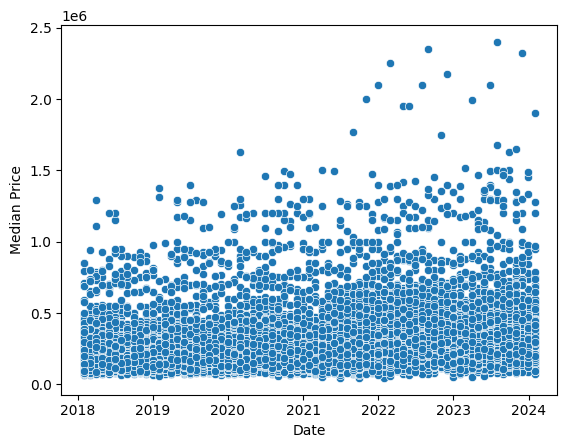

In [388]:
sns.scatterplot(data=forsale_price_melted.sample(20000), x='Date', y='Median Price')

In [389]:
forsale_price_melted.describe()

,RegionID,SizeRank,Median Price,Year,Month
count,67525.00,67525.00,65873.00,67525.00,67525.00
mean,425930.05,468.99,265584.94,2020.55,6.42
std,105379.52,270.27,175499.81,1.74,3.49
min,394297.00,1.00,44700.00,2018.00,1.00
25%,394557.00,235.00,164999.00,2019.00,3.00
50%,394813.00,470.00,220000.00,2021.00,6.00
75%,395075.00,702.00,300000.00,2022.00,9.00
max,845172.00,939.00,2695000.00,2024.00,12.00


In [390]:
forsale_melted.dropna(inplace=True)

## Merge these dataframes

In [391]:
top_tier_melted.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,Date,Top-Tier Average Home Value Estimate,Year,Month
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,2000-01-31,389752.01,2000,1
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,2000-01-31,299183.84,2000,1
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,2000-01-31,215869.03,2000,1
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,2000-01-31,248448.88,2000,1
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,2000-01-31,380822.96,2000,1
5,1286,5,Orange County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,59,2000-01-31,432407.27,2000,1
6,581,6,Kings County,county,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",36,47,2000-01-31,405157.20,2000,1
7,2964,7,Miami-Dade County,county,FL,FL,"Miami-Fort Lauderdale-Pompano Beach, FL",12,86,2000-01-31,245604.65,2000,1
8,978,8,Dallas County,county,TX,TX,"Dallas-Fort Worth-Arlington, TX",48,113,2000-01-31,204073.63,2000,1
9,2832,9,Riverside County,county,CA,CA,"Riverside-San Bernardino-Ontario, CA",6,65,2000-01-31,241029.07,2000,1


In [392]:
bottom_tier_melted.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,StateCodeFIPS,MunicipalCodeFIPS,Date,Bottom-Tier Average Home Value Estimate,Year,Month
0,3101,0,Los Angeles County,county,CA,CA,6,37,2000-01-31,120563.29,2000,1
1,139,1,Cook County,county,IL,IL,17,31,2000-01-31,69971.82,2000,1
2,1090,2,Harris County,county,TX,TX,48,201,2000-01-31,61348.08,2000,1
3,2402,3,Maricopa County,county,AZ,AZ,4,13,2000-01-31,80020.54,2000,1
4,2841,4,San Diego County,county,CA,CA,6,73,2000-01-31,127922.59,2000,1
5,1286,5,Orange County,county,CA,CA,6,59,2000-01-31,156616.68,2000,1
6,581,6,Kings County,county,NY,NY,36,47,2000-01-31,110107.27,2000,1
7,2964,7,Miami-Dade County,county,FL,FL,12,86,2000-01-31,61121.79,2000,1
8,978,8,Dallas County,county,TX,TX,48,113,2000-01-31,49695.16,2000,1
9,2832,9,Riverside County,county,CA,CA,6,65,2000-01-31,89602.13,2000,1


In [393]:
merged_data = pd.merge(left=bottom_tier_melted, right=top_tier_melted[['RegionID', 'Year', 'Month', 'Top-Tier Average Home Value Estimate']],\
                        on=['RegionID', 'Year', 'Month'])
merged_data.sample(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,StateCodeFIPS,MunicipalCodeFIPS,Date,Bottom-Tier Average Home Value Estimate,Year,Month,Top-Tier Average Home Value Estimate
310340,2928,855,Georgetown County,county,SC,SC,45,43,2019-07-31,116847.64,2019,7,479985.35
205490,3230,1637,Staunton City,county,VA,VA,51,790,2014-07-31,97303.85,2014,7,223884.08
183307,2369,933,La Plata County,county,CO,CO,8,67,2013-06-30,181606.28,2013,6,510737.79
189785,2195,740,Cheshire County,county,NH,NH,33,5,2013-10-31,105120.94,2013,10,252174.77
309578,2698,78,Fort Bend County,county,TX,TX,48,157,2019-07-31,185300.45,2019,7,392003.83


In [394]:
new_column_order = ['Date',  'Year', 'Month','RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'StateCodeFIPS', 'MunicipalCodeFIPS',
       'Bottom-Tier Average Home Value Estimate', 'Top-Tier Average Home Value Estimate']
merged_data = merged_data[new_column_order]
merged_data.sample(5)

,Date,Year,Month,RegionID,SizeRank,RegionName,RegionType,StateName,State,StateCodeFIPS,MunicipalCodeFIPS,Bottom-Tier Average Home Value Estimate,Top-Tier Average Home Value Estimate
121472,2010-03-31,2010,3,3069,112,Washington County,county,OR,OR,41,67,182117.03,382480.43
351379,2021-06-30,2021,6,2924,584,Eau Claire County,county,WI,WI,55,35,168783.84,380420.52
338343,2020-11-30,2020,11,2063,127,Volusia County,county,FL,FL,12,127,158165.49,339246.94
69456,2006-06-30,2006,6,3193,473,Spotsylvania County,county,VA,VA,51,177,202488.79,535647.42
371273,2022-05-31,2022,5,2777,637,Lancaster County,county,SC,SC,45,57,184089.84,550620.70


In [396]:
merged_data_2 = pd.merge(left=forsale_price_melted, right=rent_melted[['RegionID', 'Year', 'Month', 'Average Rent']], on=['RegionID', 'Year', 'Month'])
new_column_order = ['RegionID','Date', 'Year', 'Month','SizeRank', 'RegionName', 'RegionType', 'StateName','Median Price', 'Average Rent']
merged_data_2 = merged_data_2[new_column_order]
merged_data_2.sample(5)

,RegionID,Date,Year,Month,SizeRank,RegionName,RegionType,StateName,Median Price,Average Rent
7278,394997,2020-01-31,2020,1,105,"Portland, ME",msa,ME,362600.00,1543.33
5134,394549,2019-06-30,2019,6,95,"Durham, NC",msa,NC,337100.00,1291.35
16679,394689,2022-05-31,2022,5,392,"Hot Springs, AR",msa,AR,299000.00,1151.05
114,394761,2018-01-31,2018,1,116,"Lafayette, LA",msa,LA,207000.00,1003.46
19662,395045,2023-01-31,2023,1,26,"Sacramento, CA",msa,CA,575000.00,2159.54


In [397]:
merged_data_2 = pd.merge(left=merged_data_2, right=new_construction_sales_melted[['RegionID', 'Year', 'Month', 'New Construction Sales']], on=['RegionID', 'Year', 'Month'])
merged_data_2.sample(5)

,RegionID,Date,Year,Month,SizeRank,RegionName,RegionType,StateName,Median Price,Average Rent,New Construction Sales
14855,395134,2023-11-30,2023,11,77,"Stockton, CA",msa,CA,545000.00,2260.09,22.00
3514,394653,2019-08-31,2019,8,61,"Greenville, SC",msa,SC,260000.00,1130.19,155.00
5516,395107,2020-06-30,2020,6,159,"South Bend, IN",msa,IN,195000.00,889.50,24.00
5,395209,2018-01-31,2018,1,6,"Washington, DC",msa,VA,392000.00,1815.23,1205.00
2757,394388,2019-04-30,2019,4,51,"Birmingham, AL",msa,AL,244900.00,1054.85,60.00


In [398]:
merged_data_2 = pd.merge(left=merged_data_2, right=days_to_close_melted[['RegionID', 'Year', 'Month', 'Average Days to Close']], on=['RegionID', 'Year', 'Month'])
merged_data_2.sample(5)

,RegionID,Date,Year,Month,SizeRank,RegionName,RegionType,StateName,Median Price,Average Rent,New Construction Sales,Average Days to Close
8222,394415,2021-11-30,2021,11,60,"Bridgeport, CT",msa,CT,547900.00,2347.04,48.00,49.00
12326,394761,2023-05-31,2023,5,116,"Lafayette, LA",msa,LA,246250.00,1238.18,114.00,34.00
4383,394367,2020-03-31,2020,3,66,"Baton Rouge, LA",msa,LA,236700.00,1137.14,134.00,35.00
9760,394528,2022-06-30,2022,6,90,"Deltona, FL",msa,FL,389000.00,1827.32,208.00,34.00
7266,394646,2021-06-30,2021,6,157,"Green Bay, WI",msa,WI,259900.00,804.01,41.00,15.00


In [399]:
merged_data.to_csv("homevalues.csv")

In [400]:
merged_data_2.to_csv("housing_data_cleaned.csv")